In [9]:
#dataset: https://raw.githubusercontent.com/fivethirtyeight/data/master/redistricting-2022-state-legislatures/fivethirtyeight_state_legislative_district_analysis.csv
#import dependencies
import pandas as pd
import matplotlib as ptl
import numpy as np
from itertools import cycle, islice

In [10]:
#read congress terms dataset
file = 'state-legislatures.csv'
df = pd.read_csv(file)
print(df.head())

   year state chamber district     metric   value    pct
0  2020    AZ     NaN        1  white_vap  167765  82.25
1  2020    AZ     NaN        2  white_vap   63800  38.27
2  2020    AZ     NaN        3  white_vap   60154  36.35
3  2020    AZ     NaN        4  white_vap   48188  29.45
4  2020    AZ     NaN        5  white_vap  146707  77.32


In [11]:
#create 2020 and 2022 datasets
df2020 = df[df['year'] == '2020']
df2022 = df[df['year'] == '2022']

In [12]:
#create 2020 & 2022 pvi 
dfpvi2020 = df2020[df2020['metric'] == 'pvi']
dfpvi2022 = df2022[df2022['metric'] == 'pvi']
print(dfpvi2020.head())
print("")
print(dfpvi2022.head())

       year state chamber district metric  value  pct
21505  2020    AZ     NaN        1    pvi  -42.8  NaN
21506  2020    AZ     NaN        2    pvi   14.5  NaN
21507  2020    AZ     NaN        3    pvi   39.6  NaN
21508  2020    AZ     NaN        4    pvi    7.2  NaN
21509  2020    AZ     NaN        5    pvi  -57.6  NaN

       year state chamber district metric  value  pct
21535  2022    AZ     NaN        1    pvi  -35.7  NaN
21536  2022    AZ     NaN       10    pvi  -28.7  NaN
21537  2022    AZ     NaN       11    pvi   45.6  NaN
21538  2022    AZ     NaN       12    pvi    9.4  NaN
21539  2022    AZ     NaN       13    pvi   -6.2  NaN


In [13]:
#get median pvi by state 2020
by_state_median_2020 = dfpvi2020.groupby('state')[['value']].median()
print(by_state_median_2020)
#get median pvi by state 2022
by_state_median_2022 = dfpvi2022.groupby('state')[['value']].median()
print(by_state_median_2022)

       value
state       
AZ     -7.70
CO      8.35
CT      9.80
FL     -9.80
GA    -15.45
ME     -2.00
MI    -10.65
MN     -0.80
NC    -10.75
NM      8.40
NV      0.90
OR      9.00
PA     -8.10
TX     -6.80
VA      5.00
       value
state       
AZ     -9.15
CO      5.10
CT     11.80
FL    -10.70
GA    -20.95
ME     -1.35
MI     -4.20
MN     -2.60
NC     -7.25
NM     10.50
NV      4.60
OR      9.50
PA     -4.40
TX    -16.45
VA      5.65


In [14]:
#calculate change in pvi from 2020 to 2022
#NEW: CHANGING ROW INDEXES MANUALLY AND CALCULATING CHANGES IN LIST
pvi2020 = by_state_median_2020['value'].tolist()
pvi2022 = by_state_median_2022['value'].tolist()
#create new dataframe
pvichangedf = pd.DataFrame()
print(pvi2020)
print("")
print(pvi2022)
pvichange = []
#do calculations for every list index (same states in same spots, thankfully)
for index, item in enumerate(pvi2020):
    pvic = pvi2022[index] - pvi2020[index]
    #add change to list
    pvichange.append(pvic)
print(pvichange)
#note that by_state_median_2020 and by_state_median_2022 are interchangable here
pvichangedf.index = by_state_median_2020.index.values.tolist()
pvichangedf['value'] = pvichange
print(pvichangedf.head(15))

[-7.699999999999999, 8.350000000000001, 9.8, -9.8, -15.45, -2.0, -10.65, -0.8, -10.75, 8.4, 0.9, 9.0, -8.1, -6.800000000000001, 5.0]

[-9.15, 5.1, 11.8, -10.7, -20.950000000000003, -1.35, -4.2, -2.6, -7.25, 10.5, 4.6, 9.5, -4.4, -16.45, 5.65]
[-1.450000000000001, -3.2500000000000018, 2.0, -0.8999999999999986, -5.5000000000000036, 0.6499999999999999, 6.45, -1.8, 3.5, 2.0999999999999996, 3.6999999999999997, 0.5, 3.6999999999999993, -9.649999999999999, 0.6500000000000004]
    value
AZ  -1.45
CO  -3.25
CT   2.00
FL  -0.90
GA  -5.50
ME   0.65
MI   6.45
MN  -1.80
NC   3.50
NM   2.10
NV   3.70
OR   0.50
PA   3.70
TX  -9.65
VA   0.65


<AxesSubplot:title={'center':'Median 538 PVI by State (2020 -> 2022)'}, xlabel='State', ylabel='PVI Change (+=D, -=R)'>

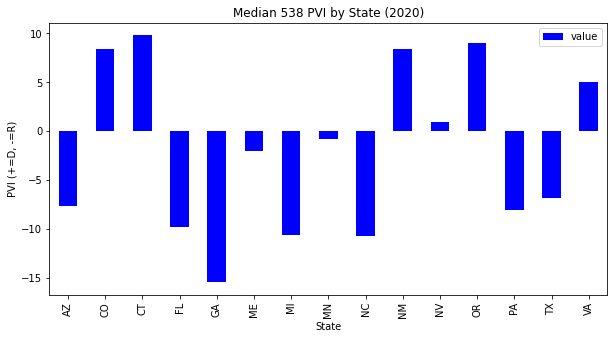

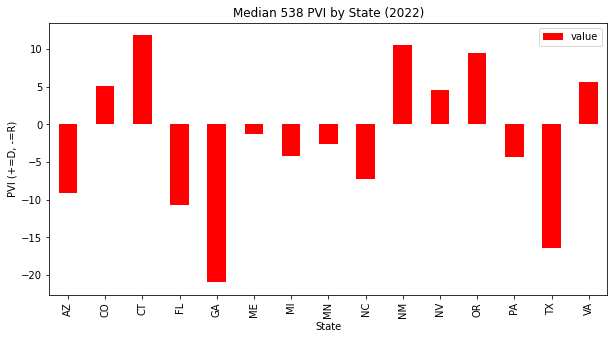

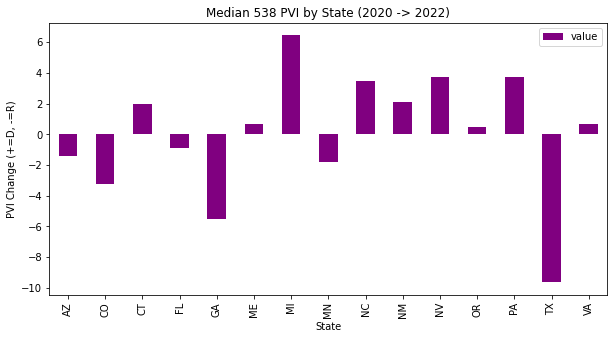

In [15]:
by_state_median_2020.plot(kind = 'bar', title = 'Median 538 PVI by State (2020)', ylabel = 'PVI (+=D, -=R)', xlabel = 'State', figsize = (10, 5), color = "blue")
by_state_median_2022.plot(kind = 'bar', title = 'Median 538 PVI by State (2022)', ylabel = 'PVI (+=D, -=R)', xlabel = 'State', figsize = (10, 5), color = "red")
pvichangedf.plot(kind = 'bar', title = 'Median 538 PVI by State (2020 -> 2022)', ylabel = 'PVI Change (+=D, -=R)', xlabel = 'State', figsize = (10, 5), color = "purple")

In [16]:
#limit dataset to white voting age population (most recent)
dfwvap = df2022[df2022['metric'] == 'white_vap']
print(dfwvap.head(25530))

      year state chamber district     metric   value    pct
30    2022    AZ     NaN        1  white_vap  162562  80.99
31    2022    AZ     NaN       10  white_vap  143947  75.85
32    2022    AZ     NaN       11  white_vap   37668  22.04
33    2022    AZ     NaN       12  white_vap  118235  62.29
34    2022    AZ     NaN       13  white_vap  110484  60.69
...    ...   ...     ...      ...        ...     ...    ...
4296  2022    VA   upper        5  white_vap  156516   85.6
4297  2022    VA   upper        6  white_vap  162308  93.13
4298  2022    VA   upper        7  white_vap  144692  82.33
4299  2022    VA   upper        8  white_vap  131557  76.42
4300  2022    VA   upper        9  white_vap  105803  60.87

[2226 rows x 7 columns]


[62.745000000000005, 73.11500000000001, 74.73, 60.86, 59.235, 93.225, 80.745, 83.12, 66.5, 40.875, 51.19, 77.565, 83.26, 49.24, 60.82]
[37.254999999999995, 26.88499999999999, 25.269999999999996, 39.14, 40.765, 6.775000000000006, 19.254999999999995, 16.879999999999995, 33.5, 59.125, 48.81, 22.435000000000002, 16.739999999999995, 50.76, 39.18]


<AxesSubplot:title={'center':'Median Non-White Voter % by State'}, xlabel='State', ylabel='Non-White Voter %'>

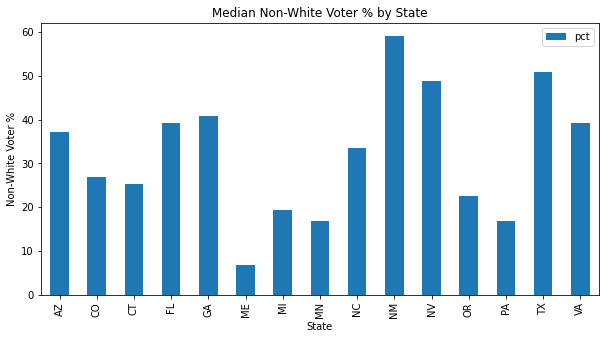

In [17]:
#get mean white voting age population % by state
by_state_wvap = dfwvap.groupby('state')[['pct']].median()
#convert to non-white voting age population %
pctcol = by_state_wvap['pct'].tolist()
print(pctcol)
newpctcol = []
for i in pctcol:
    newval = 100-i
    newpctcol.append(newval)
print(newpctcol)
#replace column in dataset
n = by_state_wvap.columns[0]
by_state_wvap.drop(n, axis = 1, inplace = True)
by_state_wvap[n] = newpctcol
by_state_wvap.plot(kind = 'bar', title = 'Median Non-White Voter % by State', ylabel = 'Non-White Voter %', xlabel = 'State', figsize = (10, 5))